In [1]:
import pandas as pd
import numpy as np
import keras 


2025-09-05 19:15:32.721068: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-05 19:15:32.721452: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-05 19:15:32.723615: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-05 19:15:32.732540: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757117732.743490    1651 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757117732.74

In [3]:
ytz = pd.read_excel('archivo_combinado.xlsx')

In [4]:
ytz.head()

,Imagen,L*,a*,b*,Ph,% Acidez,Origen
0,1,39.52,14.04,8.32,6.27,0.0099,Llama
1,2,39.52,14.04,8.32,6.27,0.0099,Llama
2,3,43.01,12.85,9.27,6.37,0.0081,Llama
3,4,43.01,12.85,9.27,6.37,0.0081,Llama
4,5,26.65,23.99,12.28,5.98,0.0090,Llama


In [ ]:
ytz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Imagen    842 non-null    int64  
 1   L*        842 non-null    float64
 2   a*        842 non-null    float64
 3   b*        842 non-null    float64
 4   Ph        842 non-null    float64
 5   % Acidez  842 non-null    float64
 6   Origen    842 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 46.2+ KB


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Configuración reproducible
np.random.seed(42)
tf.random.set_seed(42)


df = pd.read_excel('archivo_combinado.xlsx') # Reemplaza con pd.read_csv('tu_archivo.csv')

# 2. Preprocesamiento
X = df[['L*', 'a*', 'b*', 'Ph', '% Acidez']].values
y = LabelEncoder().fit_transform(df['Origen'])  # Llama=0, alpaca=1

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Construcción del modelo
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(5,)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# 4. Compilación
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 5. Entrenamiento con early stopping
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# 6. Evaluación
print("\nEvaluación del modelo:")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en prueba: {test_acc:.4f}")

# 7. Métricas detalladas
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=['Llama', 'Alpaca']))

# 8. Función de predicción para nuevos datos
def predecir_origen(nueva_muestra):
    muestra_escalada = scaler.transform([nueva_muestra])
    proba = model.predict(muestra_escalada, verbose=0)[0][0]
    return "Alpaca" if proba > 0.5 else "Llama", f"{proba:.4f}"

# Ejemplo de uso:
ejemplo_muestra = [34.0, 14.0, 9.0, 5.8, 0.8]
clase, probabilidad = predecir_origen(ejemplo_muestra)
print(f"\nPredicción ejemplo: {clase} (Probabilidad: {probabilidad})")

# 9. Guardar modelo (opcional)
# model.save('modelo_clasificacion_carnes.h5')

Epoch 1/100


/home/sebastian/ia/estable/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-05 06:23:33.236418: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5006 - loss: 0.6880 - val_accuracy: 0.8222 - val_loss: 0.6052
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8300 - loss: 0.5691 - val_accuracy: 0.9556 - val_loss: 0.4880
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8754 - loss: 0.4639 - val_accuracy: 0.9704 - val_loss: 0.3738
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9391 - loss: 0.3538 - val_accuracy: 0.9926 - val_loss: 0.2653
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9561 - loss: 0.2716 - val_accuracy: 0.9926 - val_loss: 0.1778
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9747 - loss: 0.1947 - val_accuracy: 0.9926 - val_loss: 0.1157
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9835 - loss: 0.1317 - val_accuracy: 1.0000 - val_loss: 0.0766
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9941 - loss: 0.1042 - val_accuracy: 1.0000 - val_loss: 0.0

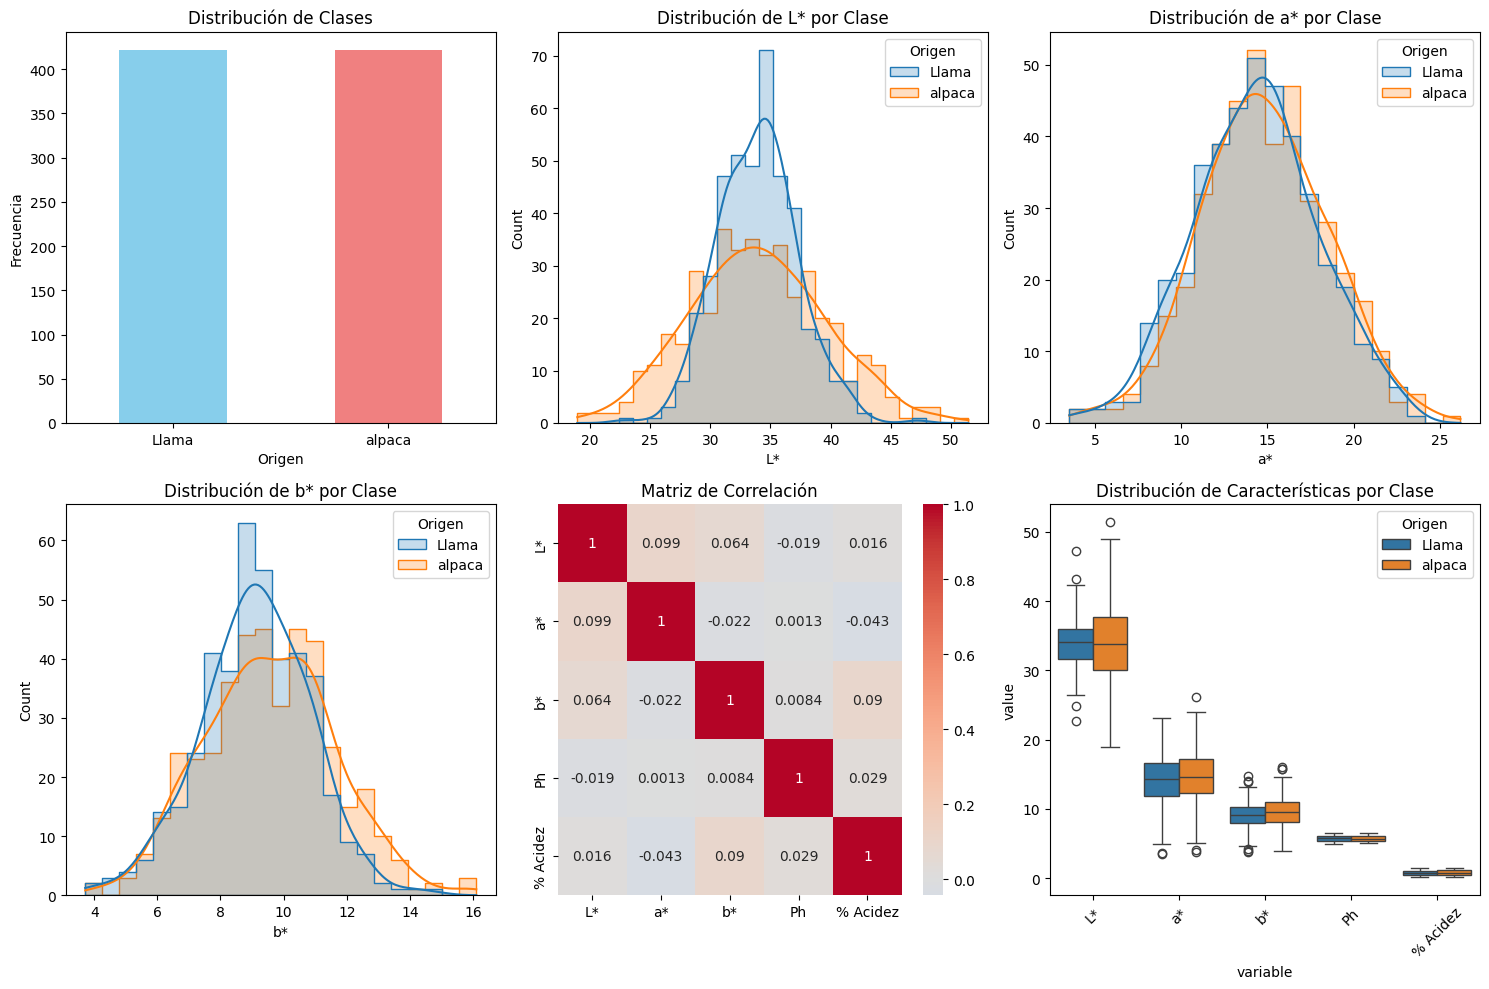

Epoch 1/100


/home/sebastian/ia/estable/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4822 - loss: 0.7346 - precision: 0.5097 - recall: 0.2553 - val_accuracy: 0.5333 - val_loss: 0.6851 - val_precision: 0.4909 - val_recall: 0.4355
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5272 - loss: 0.7027 - precision: 0.5560 - recall: 0.5042 - val_accuracy: 0.5333 - val_loss: 0.6896 - val_precision: 0.4950 - val_recall: 0.8065
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5624 - loss: 0.6837 - precision: 0.5680 - recall: 0.6652 - val_accuracy: 0.5259 - val_loss: 0.6884 - val_precision: 0.4898 - val_recall: 0.7742
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5846 - loss: 0.6779 - precision: 0.5903 - recall: 0.6780 - val_accuracy: 0.5111 - val_loss: 0.6871 - val_precision: 0.4792 - val_recall: 0.7419
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5586 - loss: 0.6716 - precision: 0.5590 - recall: 0.7233 - val_accuracy: 0.5111 - val_loss: 0.6838 - val_preci

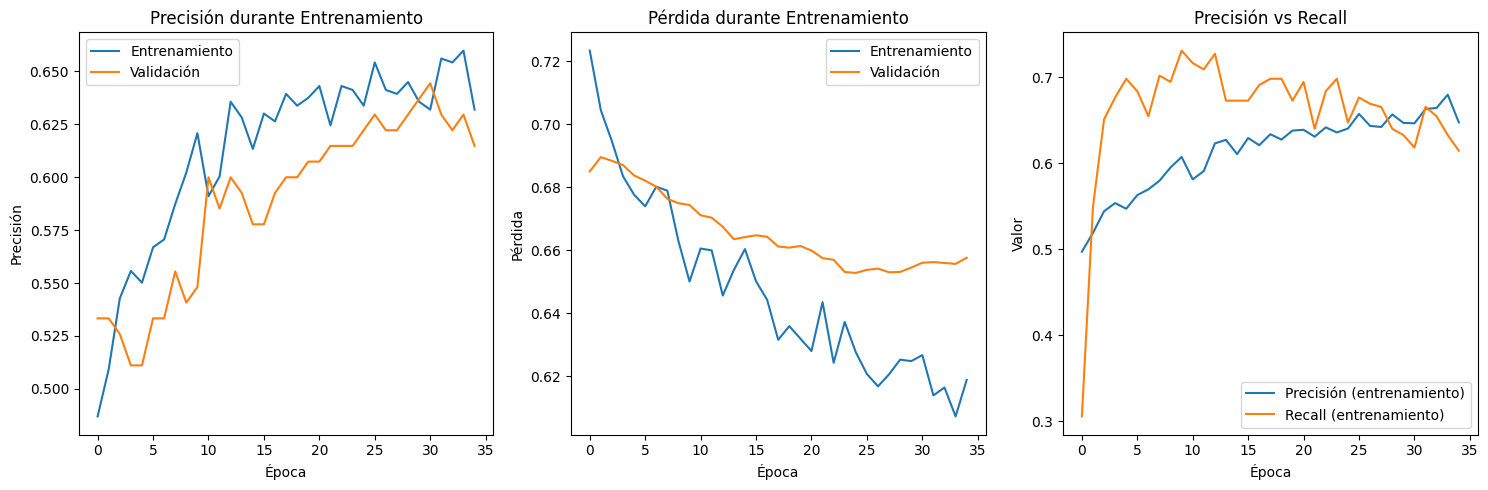


Evaluación del modelo:
Pérdida en prueba: 0.6227
Precisión en prueba: 0.6272
Precisión: 0.6105
Recall: 0.6905
F1-Score: 0.6480
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


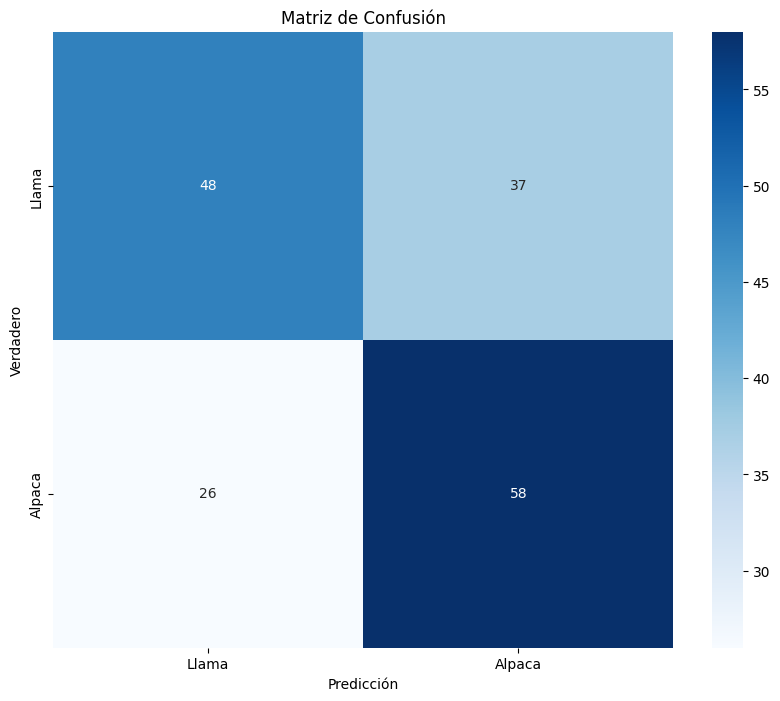

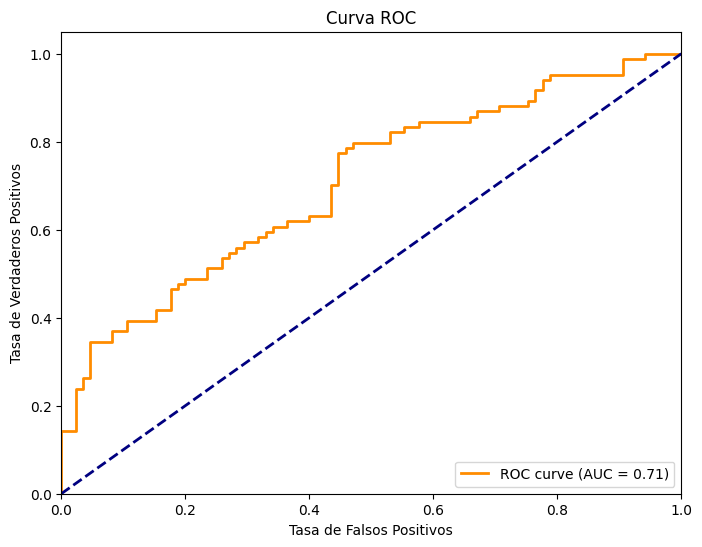

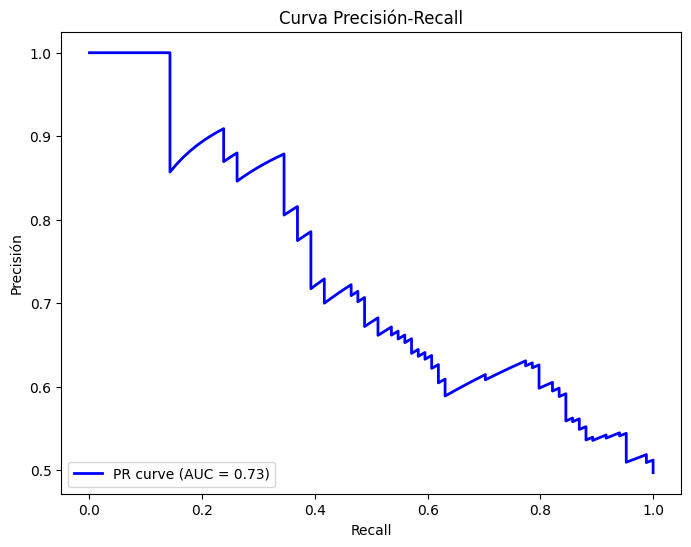


Reporte de clasificación:
              precision    recall  f1-score   support

       Llama       0.65      0.56      0.60        85
      Alpaca       0.61      0.69      0.65        84

    accuracy                           0.63       169
   macro avg       0.63      0.63      0.63       169
weighted avg       0.63      0.63      0.63       169



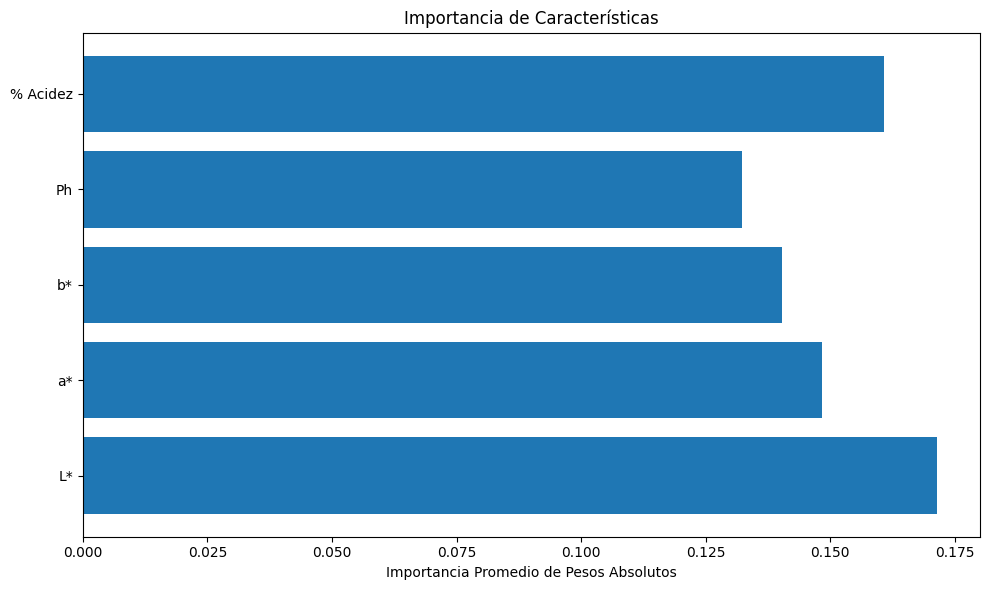


Predicción ejemplo: Llama (Probabilidad: 0.4036)

Todos los gráficos han sido guardados en el directorio actual.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Configuración reproducible
np.random.seed(42)
tf.random.set_seed(42)

# 1. Cargar y preparar datos
def load_data():
    # Simular datos basados en tu descripción (reemplaza con tu CSV real)
    data = {
        'L*': np.concatenate([np.random.normal(33.86, 3.46, 421),
                             np.random.normal(34.12, 5.63, 421)]),
        'a*': np.concatenate([np.random.normal(13.91, 3.60, 421),
                             np.random.normal(14.53, 3.66, 421)]),
        'b*': np.concatenate([np.random.normal(9.12, 1.79, 421),
                             np.random.normal(9.51, 2.12, 421)]),
        'Ph': np.random.uniform(5.0, 6.5, 842),
        '% Acidez': np.random.uniform(0.1, 1.5, 842),
        'Origen': ['Llama'] * 421 + ['alpaca'] * 421
    }
    return pd.DataFrame(data)

df = load_data()  # Reemplaza con pd.read_csv('tu_archivo.csv')

# 2. Análisis exploratorio y visualizaciones
plt.figure(figsize=(15, 10))

# Distribución de clases
plt.subplot(2, 3, 1)
df['Origen'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribución de Clases')
plt.xlabel('Origen')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)

# Distribución de L*
plt.subplot(2, 3, 2)
sns.histplot(data=df, x='L*', hue='Origen', kde=True, element='step')
plt.title('Distribución de L* por Clase')

# Distribución de a*
plt.subplot(2, 3, 3)
sns.histplot(data=df, x='a*', hue='Origen', kde=True, element='step')
plt.title('Distribución de a* por Clase')

# Distribución de b*
plt.subplot(2, 3, 4)
sns.histplot(data=df, x='b*', hue='Origen', kde=True, element='step')
plt.title('Distribución de b* por Clase')

# Matriz de correlación
plt.subplot(2, 3, 5)
corr_matrix = df[['L*', 'a*', 'b*', 'Ph', '% Acidez']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')

# Boxplot de características por clase
plt.subplot(2, 3, 6)
df_melted = df.melt(id_vars='Origen', value_vars=['L*', 'a*', 'b*', 'Ph', '% Acidez'])
sns.boxplot(data=df_melted, x='variable', y='value', hue='Origen')
plt.title('Distribución de Características por Clase')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('exploratory_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Preprocesamiento
X = df[['L*', 'a*', 'b*', 'Ph', '% Acidez']].values
y = LabelEncoder().fit_transform(df['Origen'])  # Llama=0, alpaca=1

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Construcción del modelo
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(5,)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# 5. Compilación
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)

# 6. Entrenamiento con early stopping
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True, verbose=1
)

history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# 7. Visualización del entrenamiento
plt.figure(figsize=(15, 5))

# Precisión
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Precisión vs Recall
plt.subplot(1, 3, 3)
plt.plot(history.history['precision'], label='Precisión (entrenamiento)')
plt.plot(history.history['recall'], label='Recall (entrenamiento)')
plt.title('Precisión vs Recall')
plt.xlabel('Época')
plt.ylabel('Valor')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
plt.show()

# 8. Evaluación
print("\nEvaluación del modelo:")
test_loss, test_acc, test_precision, test_recall = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Pérdida en prueba: {test_loss:.4f}")
print(f"Precisión en prueba: {test_acc:.4f}")
print(f"Precisión: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {2 * (test_precision * test_recall) / (test_precision + test_recall):.4f}")

# 9. Predicciones
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
y_pred_proba = model.predict(X_test_scaled)

# 10. Matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Llama', 'Alpaca'], 
            yticklabels=['Llama', 'Alpaca'])
plt.title('Matriz de Confusión')
plt.ylabel('Verdadero')
plt.xlabel('Predicción')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# 11. Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# 12. Curva Precisión-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva Precisión-Recall')
plt.legend(loc="lower left")
plt.savefig('precision_recall_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# 13. Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=['Llama', 'Alpaca']))

# 14. Importancia de características (usando pesos de la primera capa)
weights = model.layers[0].get_weights()[0]
feature_importance = np.mean(np.abs(weights), axis=1)
feature_names = ['L*', 'a*', 'b*', 'Ph', '% Acidez']

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Importancia Promedio de Pesos Absolutos')
plt.title('Importancia de Características')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# 15. Función de predicción para nuevos datos
def predecir_origen(nueva_muestra):
    """
    Predice el origen de una muestra de carne
    
    Args:
        nueva_muestra: Lista con valores [L*, a*, b*, Ph, % Acidez]
    
    Returns:
        tuple: (clase, probabilidad)
    """
    muestra_escalada = scaler.transform([nueva_muestra])
    proba = model.predict(muestra_escalada, verbose=0)[0][0]
    clase = "Alpaca" if proba > 0.5 else "Llama"
    return clase, f"{proba:.4f}"

# Ejemplo de uso:
ejemplo_muestra = [34.0, 14.0, 9.0, 5.8, 0.8]
clase, probabilidad = predecir_origen(ejemplo_muestra)
print(f"\nPredicción ejemplo: {clase} (Probabilidad: {probabilidad})")

# 16. Guardar modelo (opcional)
# model.save('modelo_clasificacion_carnes.h5')
# np.save('scaler_mean.npy', scaler.mean_)
# np.save('scaler_scale.npy', scaler.scale_)

print("\nTodos los gráficos han sido guardados en el directorio actual.")